<a href="https://colab.research.google.com/github/Sharens/Python/blob/main/Insurance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#authentication to google account
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
url = 'https://drive.google.com/file/d/1_Wn2OB5sGaJAsHwr1dyPL4gAHqppYjNZ/view?usp=sharing'
df1 = pd.read_csv(url)


# searching for id of file
id = url.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('insurance.csv') 
 
df = pd.read_csv('insurance.csv')

In [ ]:
expenses_df = pd.merge(df['expenses'], df['region'],  right_index = True, left_index = True)

#average
expenses_average = expenses_df.groupby(['region']).mean()
expenses_avg_round = expenses_average.round(decimals = 2)

expenses_avg_round['region'] = expenses_avg_round.index

#expenses_avg_round = expenses_df.drop(columns = ['region'])
expenses_avg_round['expenses'].astype(float)
expenses_avg_sort = expenses_avg_round.sort_values(['expenses'], ascending = False)

#BMI agregation
df_bmi = pd.merge(df['bmi'].round(0), df['expenses'],  right_index = True, left_index = True)
sum_bmi = df_bmi.groupby(['bmi']).mean()
count_bmi = df_bmi.groupby(['bmi']).count()
print(df)



#Size of the charts
sns.set(rc = {'figure.figsize':(20,10)})


      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


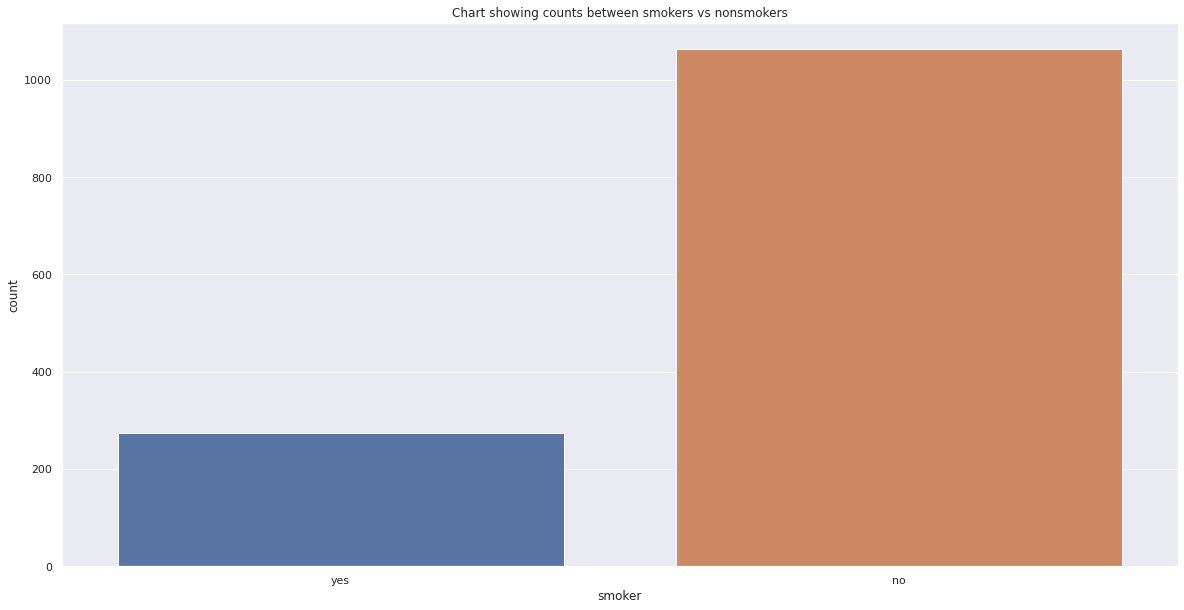

In [ ]:

smoker_plot = sns.countplot(data = df, x = 'smoker').set_title('Chart showing counts between smokers vs nonsmokers')
plt.show(smoker_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


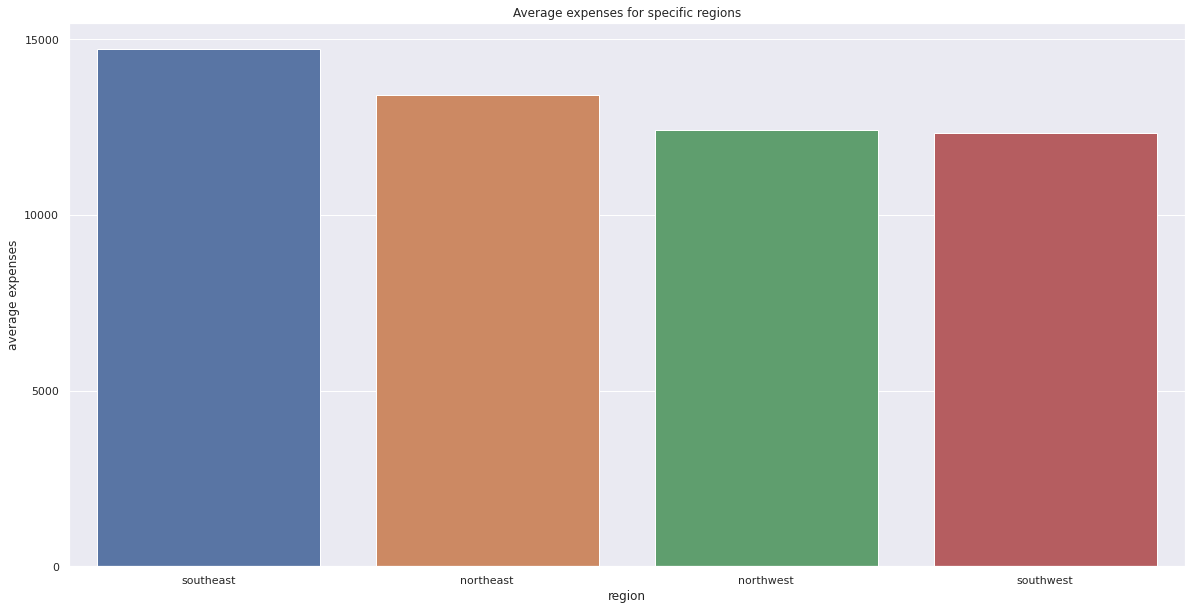

In [ ]:
#average of expenses for specific regions
avg_plot = sns.barplot(expenses_avg_sort.index, expenses_avg_sort.expenses)
ticks = [0, 5000, 10000, 15000]
avg_plot.set_yticks(ticks)
avg_plot.set_yticklabels(ticks)
avg_plot.set(title = 'Average expenses for specific regions')
plt.ylabel('average expenses')
plt.show(avg_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


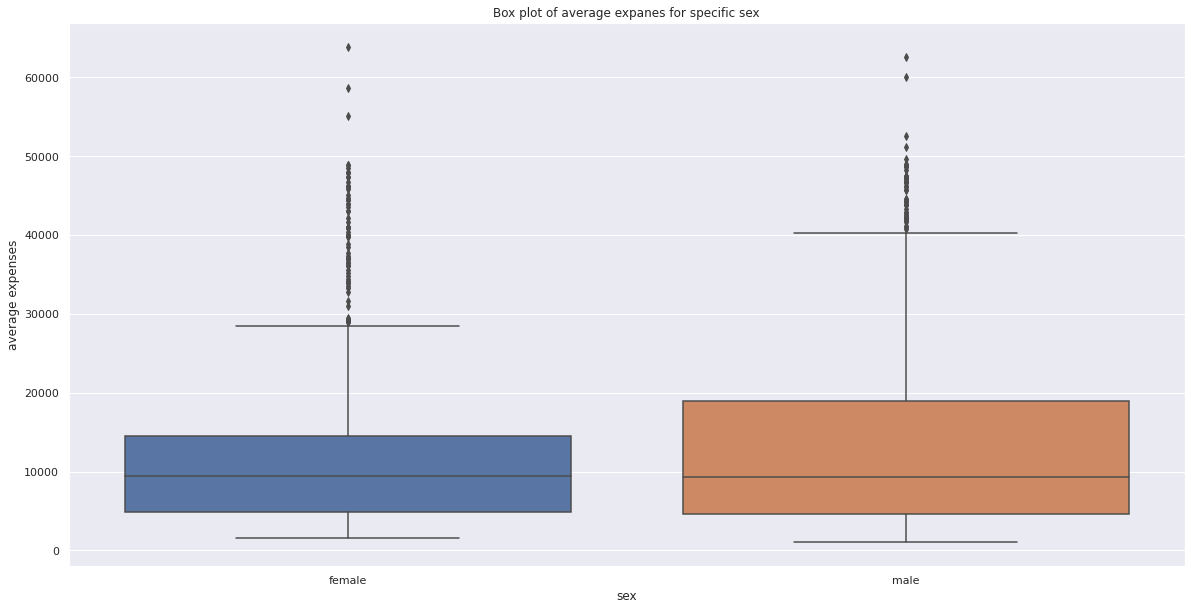

In [ ]:
#creating plot for sex
sex_plot = sns.boxplot(df.sex, df.expenses)
sex_plot.set(title = 'Box plot of average expanes for specific sex')
plt.ylabel('average expenses')
plt.show(sex_plot)

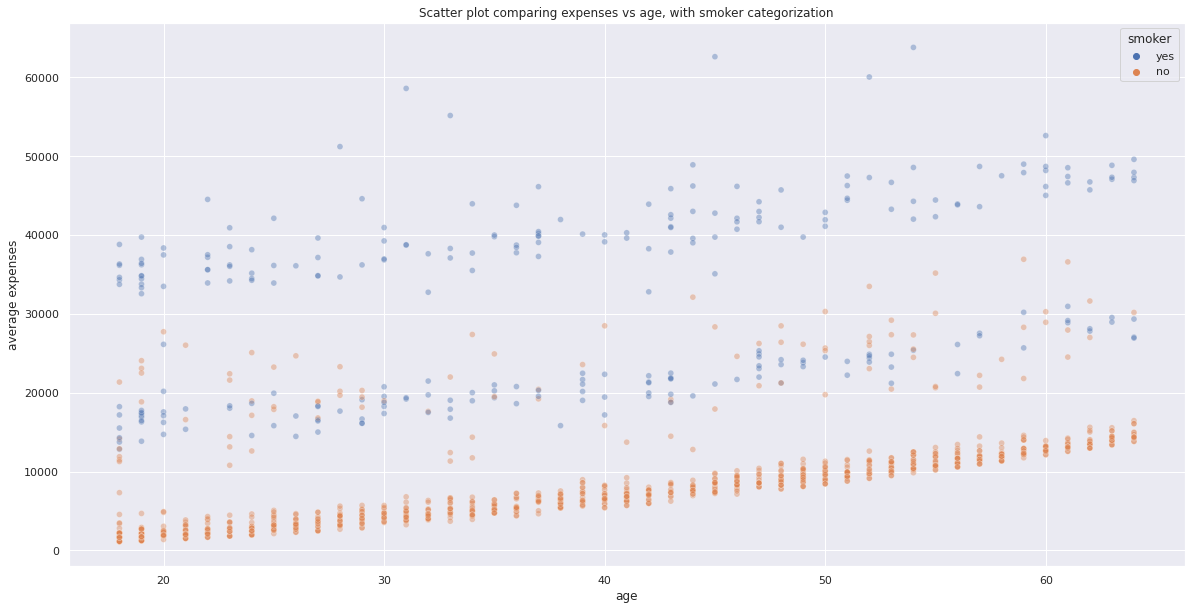

In [ ]:
#scatter plot expenses vs age, with smoker categorization
exp_scat_plot = sns.scatterplot(data = df, x = 'age', y = 'expenses', hue = 'smoker', alpha=0.4)
exp_scat_plot .set(title = 'Scatter plot comparing expenses vs age, with smoker categorization')
plt.ylabel('average expenses')
plt.show(exp_scat_plot)

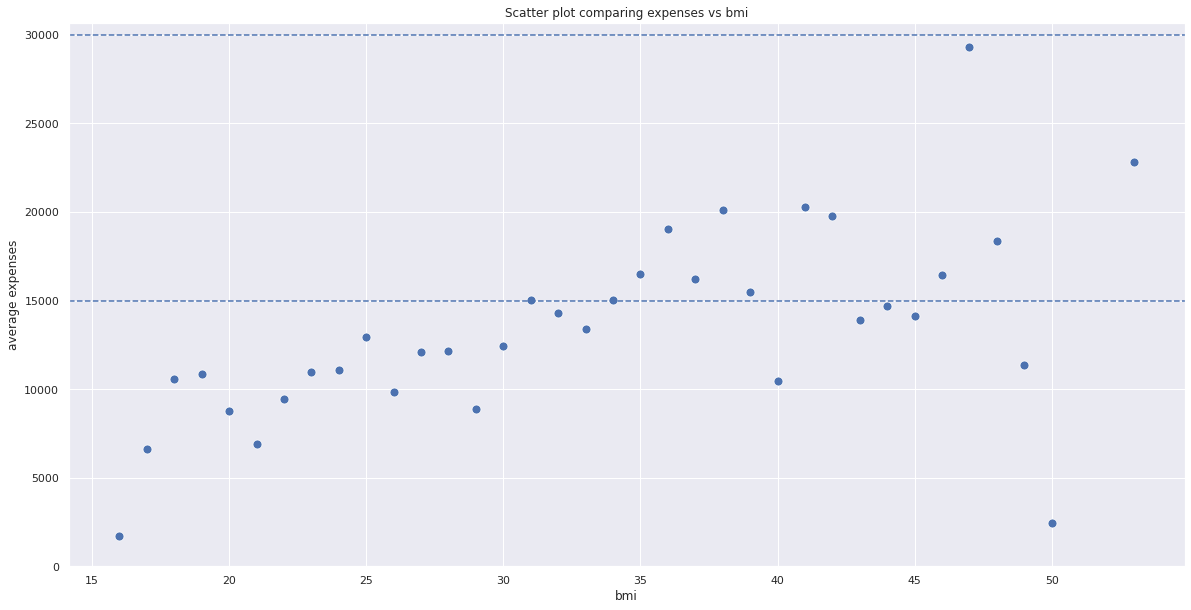

In [ ]:
#scatter plot expenses vs bmi
bmi_plot = sns.scatterplot(data = sum_bmi, x = 'bmi', y = 'expenses', s=80)
bmi_plot.set(title = 'Scatter plot comparing expenses vs bmi')
bmi_ticks = [0, 5000, 10000, 15000, 20000, 25000, 30000]
bmi_plot.set_yticks(bmi_ticks)
plt.ylabel('average expenses')

#adding horizontal line
bmi_plot.axhline(15000, linestyle = '--')
bmi_plot.axhline(30000, linestyle = '--')

plt.show(bmi_plot)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


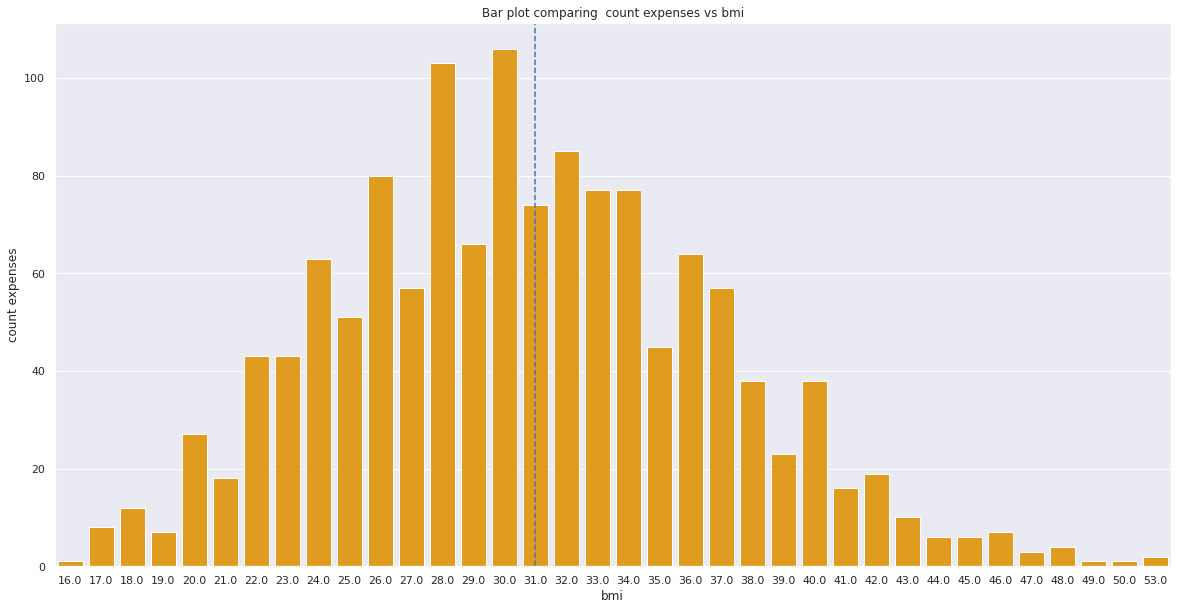

In [ ]:
#BMI bar plot
bmi_bar_plot = sns.barplot(count_bmi.index, count_bmi.expenses, color = 'orange')
bmi_bar_plot.set(title = 'Bar plot comparing  count expenses vs bmi')
plt.axvline(15, linestyle = '--')
plt.ylabel('count expenses')
plt.show(bmi_bar_plot)

[Text(0.5, 1.0, 'Scatterplot for expenses and BMI')]

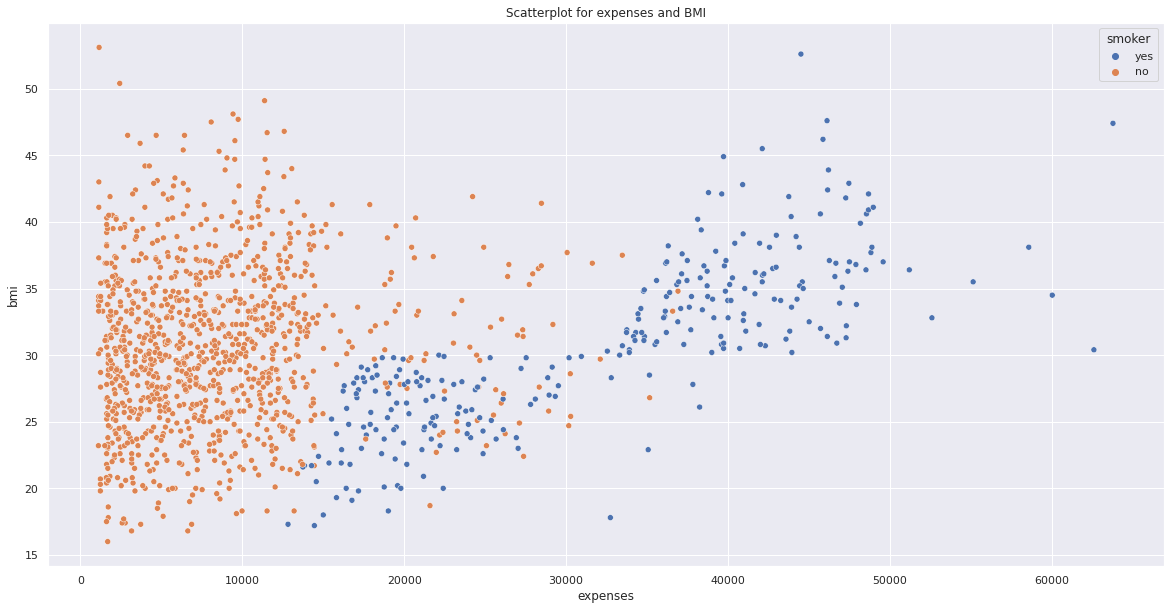

In [ ]:
expenses_scatter = sns.scatterplot(data=df, x=df['expenses'], y=df['bmi'], hue=df['smoker'])
expenses_scatter.set(title = 'Scatterplot for expenses and BMI')

In [ ]:
#Creating groups for expenses column
exp_set = [df]

for column in exp_set:
    column.loc[column['expenses'] <= 3000, 'exp_group'] = 0
    column.loc[(column['expenses'] >= 3000) & (column['expenses'] < 6000), 'exp_group'] = 3000
    column.loc[(column['expenses'] >= 6000) & (column['expenses'] < 9000), 'exp_group'] = 6000
    column.loc[(column['expenses'] >= 9000) & (column['expenses'] < 12000), 'exp_group'] = 9000
    column.loc[(column['expenses'] >= 12000) & (column['expenses'] < 15000), 'exp_group'] = 12000
    column.loc[(column['expenses'] >= 15000) & (column['expenses'] < 18000), 'exp_group'] = 15000
    column.loc[(column['expenses'] >= 18000) & (column['expenses'] < 21000), 'exp_group'] = 18000
    column.loc[(column['expenses'] >= 21000) & (column['expenses'] < 24000), 'exp_group'] = 21000
    column.loc[(column['expenses'] >= 24000) & (column['expenses'] < 27000), 'exp_group'] = 24000
    column.loc[(column['expenses'] >= 27000) & (column['expenses'] < 30000), 'exp_group'] = 27000
    column.loc[(column['expenses'] >= 30000) & (column['expenses'] < 33000), 'exp_group'] = 30000
    column.loc[(column['expenses'] >= 33000) & (column['expenses'] < 36000), 'exp_group'] = 33000
    column.loc[(column['expenses'] >= 36000) & (column['expenses'] < 39000), 'exp_group'] = 36000
    column.loc[(column['expenses'] >= 39000) & (column['expenses'] < 42000), 'exp_group'] = 39000
    column.loc[(column['expenses'] >= 42000) & (column['expenses'] < 45000), 'exp_group'] = 42000
    column.loc[(column['expenses'] >= 45000) & (column['expenses'] < 48000), 'exp_group'] = 45000
    column.loc[(column['expenses'] >= 48000) & (column['expenses'] < 51000), 'exp_group'] = 48000
    column.loc[(column['expenses'] >= 51000) & (column['expenses'] < 54000), 'exp_group'] = 51000
    column.loc[(column['expenses'] >= 54000) & (column['expenses'] < 57000), 'exp_group'] = 57000
    column.loc[(column['expenses'] > 57000), 'exp_group'] = 60000


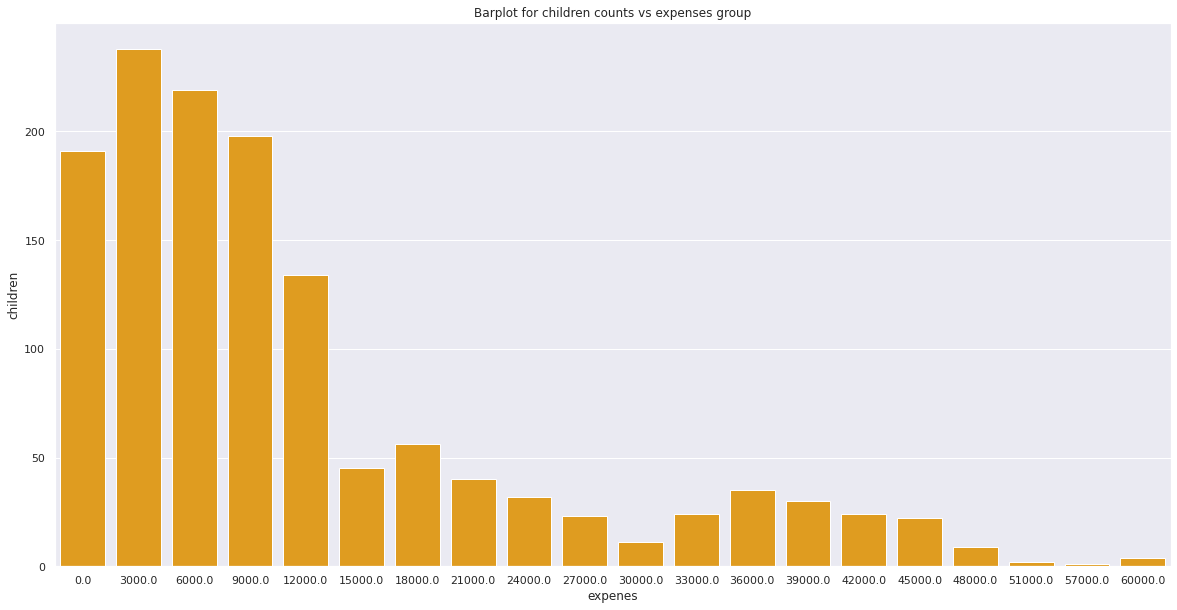

In [ ]:
children_df = pd.merge(df['children'], df['exp_group'], right_index = True, left_index = True)
children_df = children_df.groupby(['exp_group']).count()


children_plot = sns.barplot(data = children_df, x = children_df.index, y = 'children', color = 'orange')
children_plot.set(title = 'Barplot for children counts vs expenses group')
plt.xlabel('expenes')
plt.show(children_plot)